In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score
import ppscore as pps
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.isna().sum()        # No Null values

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


### Defining X & Y

In [7]:
x1 = df.drop(columns='letter',axis=1)
y1 = df['letter']

In [8]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [9]:
df['x2bar'].nunique()

16

### Data Visualization

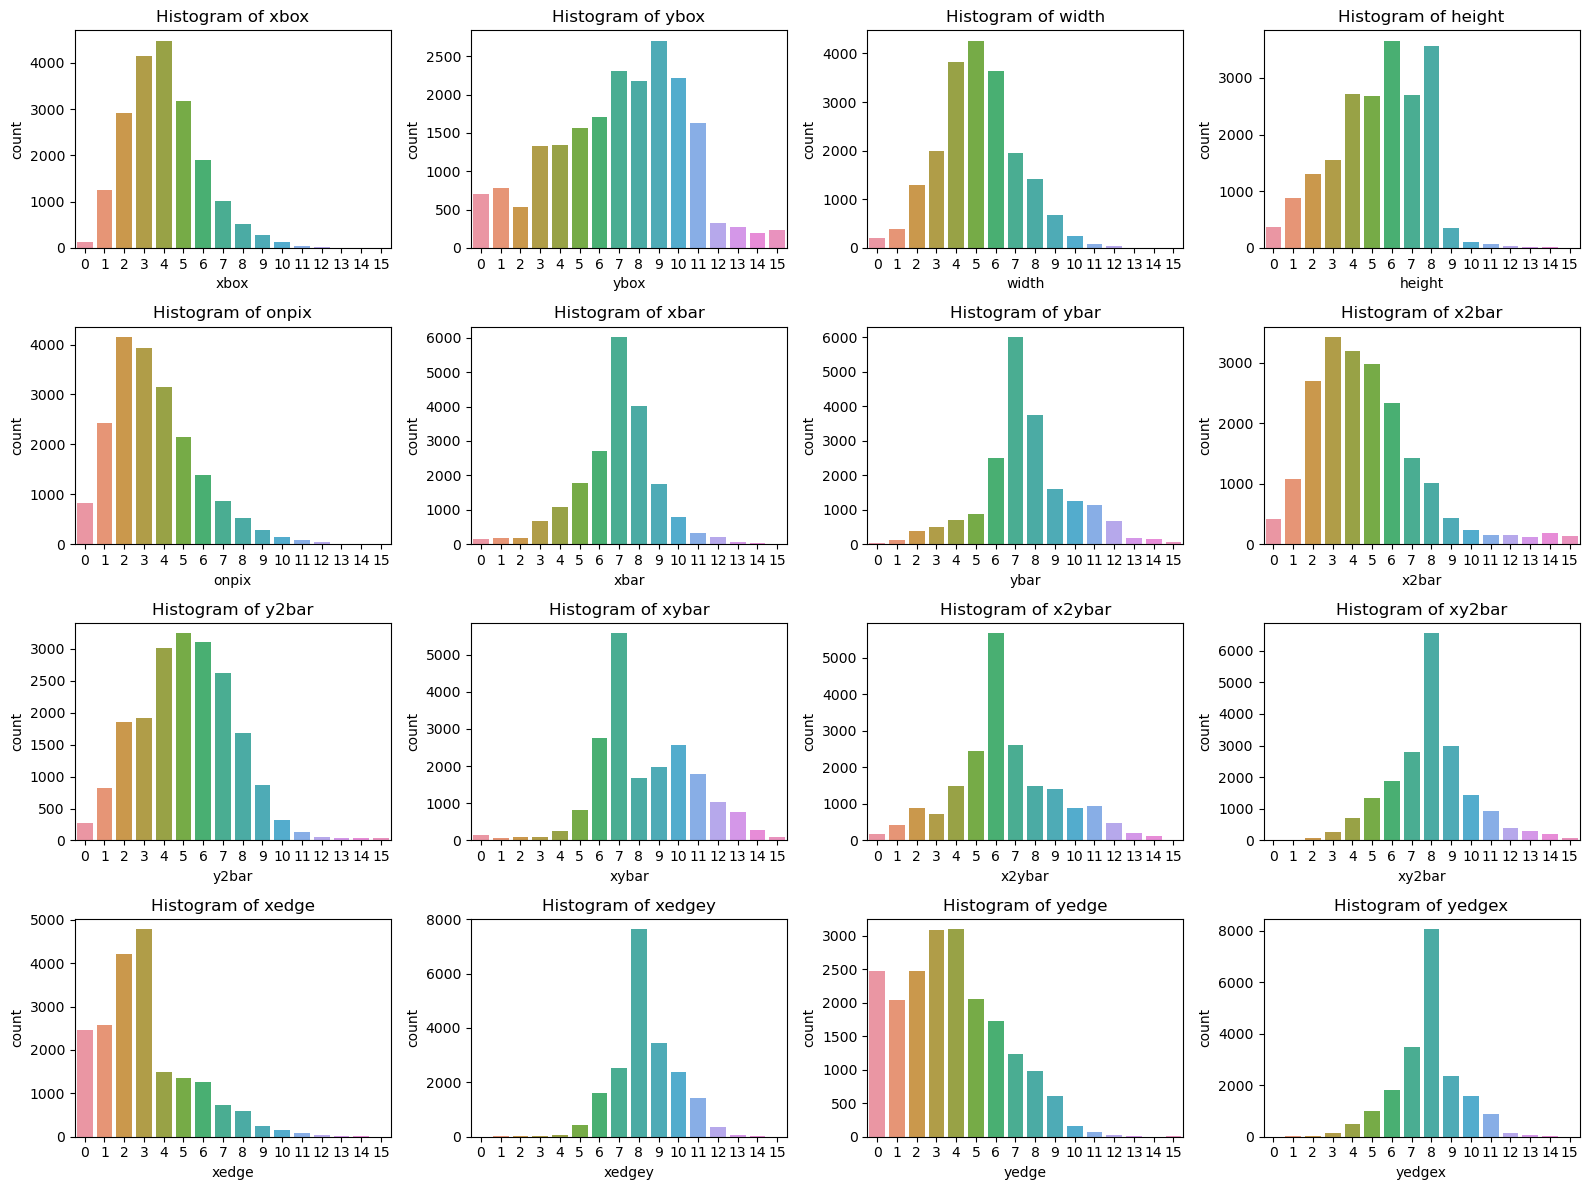

In [10]:
numerical_features = ['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex']
plt.figure(figsize=(16,12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x = df[feature])
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

### Encoding 

In [11]:
# using Label Encoder for encoding Target column as it is originally categorical in nature.
le = LabelEncoder()         
y = le.fit_transform(y1)
y3 = pd.DataFrame(y,columns=['letter'])
y3.value_counts()

letter
20        813
3         805
15        803
19        796
12        792
0         789
23        787
24        786
16        783
13        783
5         775
6         773
4         768
1         766
21        764
11        761
17        758
8         755
14        753
22        752
18        748
9         747
10        739
2         736
7         734
25        734
dtype: int64

### Standardization

In [12]:
# Using Standardization on all columns except target column.
sc = StandardScaler() 
x = sc.fit_transform(x1)
x

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [13]:
dft = pd.DataFrame(x, columns=x1.columns)
dft

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


## Model Building

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
ann = Sequential()           # neural network model using the Sequential API

#Creating the hidden layer
ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=10, activation='relu'))

ann.add(Dense(units=len(np.unique(y)), activation='softmax'))

# Compiling the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train ANN
ann.fit(xtrain,ytrain,epochs=250,validation_data=(xtest,ytest))

Epoch 1/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1122 - loss: 3.0525 - val_accuracy: 0.3173 - val_loss: 2.2344
Epoch 2/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3632 - loss: 2.0691 - val_accuracy: 0.4770 - val_loss: 1.6856
Epoch 3/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4969 - loss: 1.6110 - val_accuracy: 0.5640 - val_loss: 1.4182
Epoch 4/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5756 - loss: 1.3925 - val_accuracy: 0.6058 - val_loss: 1.2994
Epoch 5/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6008 - loss: 1.2849 - val_accuracy: 0.6250 - val_loss: 1.2220
Epoch 6/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6359 - loss: 1.2012 - val_accuracy: 0.6505 - val_loss: 1.1638
Epoch 7/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6595 - loss: 1.1387 - val_accuracy: 0.6683 - val_loss: 1.1103
Epoch 8/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6657 - loss: 1.1198 - val_accu

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7740 - loss: 0.7481 - val_accuracy: 0.7807 - val_loss: 0.7568
Epoch 52/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7767 - loss: 0.7462 - val_accuracy: 0.7790 - val_loss: 0.7558
Epoch 53/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.7528 - val_accuracy: 0.7850 - val_loss: 0.7463
Epoch 54/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7697 - loss: 0.7675 - val_accuracy: 0.7847 - val_loss: 0.7466
Epoch 55/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7747 - loss: 0.7440 - val_accuracy: 0.7780 - val_loss: 0.7530
Epoch 56/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7769 - loss: 0.7313 - val_accuracy: 0.7765 - val_loss: 0.7508
Epoch 57/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.7375 - val_accuracy: 0.7810 - val_loss: 0.7459
Epoch 58/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7788 - loss: 0.7424 - val_accuracy:

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.6639 - val_accuracy: 0.7937 - val_loss: 0.6979
Epoch 102/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.6589 - val_accuracy: 0.7997 - val_loss: 0.6944
Epoch 103/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.6708 - val_accuracy: 0.7952 - val_loss: 0.6977
Epoch 104/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.6561 - val_accuracy: 0.7952 - val_loss: 0.6991
Epoch 105/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.6658 - val_accuracy: 0.7985 - val_loss: 0.6909
Epoch 106/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.6711 - val_accuracy: 0.7960 - val_loss: 0.6957
Epoch 107/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.6596 - val_accuracy: 0.7968 - val_loss: 0.6977
Epoch 108/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.6585 - val_ac

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7995 - loss: 0.6553 - val_accuracy: 0.8060 - val_loss: 0.6615
Epoch 151/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.6447 - val_accuracy: 0.8083 - val_loss: 0.6592
Epoch 152/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.6615 - val_accuracy: 0.8065 - val_loss: 0.6667
Epoch 153/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 0.6326 - val_accuracy: 0.8065 - val_loss: 0.6593
Epoch 154/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.6499 - val_accuracy: 0.8018 - val_loss: 0.6696
Epoch 155/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.6377 - val_accuracy: 0.8070 - val_loss: 0.6567
Epoch 156/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.6409 - val_accuracy: 0.8070 - val_loss: 0.6597
Epoch 157/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8050 - loss: 0.6500 - val_ac

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.6153 - val_accuracy: 0.8083 - val_loss: 0.6504
Epoch 200/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.6159 - val_accuracy: 0.8117 - val_loss: 0.6551
Epoch 201/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.6162 - val_accuracy: 0.8087 - val_loss: 0.6525
Epoch 202/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.6228 - val_accuracy: 0.8077 - val_loss: 0.6549
Epoch 203/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.6311 - val_accuracy: 0.8110 - val_loss: 0.6439
Epoch 204/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.6340 - val_accuracy: 0.8138 - val_loss: 0.6433
Epoch 205/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.6059 - val_accuracy: 0.8100 - val_loss: 0.6497
Epoch 206/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8077 - loss: 0.6419 - val_ac

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8178 - loss: 0.6085 - val_accuracy: 0.8102 - val_loss: 0.6400
Epoch 249/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8142 - loss: 0.6172 - val_accuracy: 0.8110 - val_loss: 0.6417
Epoch 250/250
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8173 - loss: 0.6179 - val_accuracy: 0.8120 - val_loss: 0.6437


In [16]:
# 1 Hidden Layer:
    # Accuracy : 79 %
    # Loss :61 %
    
# 2 Hidden Layers:
    # Accuracy : 81 % 
    # Loss : 59 %

# 3 Hidden Layers:
    # Accuracy: 83 %
    # Loss : 58 %
    
# This clearly represents, our major hyper-parameter in this algorithm is number of hidden layers.
# We will tune this hyper-parameter along with other parameters.

In [17]:
y_pred1 = ann.predict(xtest)         # Converting Predicted values from continous to original format for analysis
ypred1 = np.argmax(y_pred1, axis=1)
ypred1

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([23, 15,  0, ..., 14, 24, 24], dtype=int64)

In [20]:
b_loss = ann.evaluate(xtest, ytest, verbose=0)[0]  # Extracting the loss value
print(f'Loss: {b_loss}')     # Without tuning, losses are very high 

Loss: 0.6436709761619568


In [21]:
# Assigning Variables to diff metrics for comparison & analysis

b_accuracy = accuracy_score(ytest,ypred1)
b_recall = recall_score(ytest,ypred1,average='weighted')
b_precision = precision_score(ytest,ypred1,average='weighted')
b_f1 = f1_score(ytest,ypred1,average='weighted')

In [22]:
before = pd.DataFrame({'Metrics':['Accuracy','f1_score','Precision','Recall','Loss'],
                    'Values':[b_accuracy,b_f1,b_precision,b_recall,b_loss]})
before

,Metrics,Values
0,Accuracy,0.812000
1,f1_score,0.810666
2,Precision,0.815570
3,Recall,0.812000
4,Loss,0.643671


## Hyper-Parameter Tuning

In [23]:
import keras_tuner as kt

In [24]:
def hyper(hp):
    model = Sequential()
    counter = 0  # Initialize counter

    # Looping through a range of layers 
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        units = hp.Int('units' + str(i), min_value=8, max_value=128, step=8)
        activation = hp.Choice('activation' + str(i), values=['relu'])

        if counter == 0:
            # Adding the first layer 
            model.add(Dense(units=units, activation=activation))
        else:
            # Adding subsequent layers
            model.add(Dense(units=units, activation=activation))

        counter += 1  # Increment the counter

    # Adding the output layer 
    model.add(Dense(units=len(np.unique(y)), activation='softmax'))

    # Compiling the model with hyperparameter-specified optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [25]:
# Using RandomSearch tuner from keras tuner
# The tuner explores the hyperparameter space randomly to find the best hyperparameter configuration.

tuner = kt.RandomSearch(
    hyper,
    objective='val_accuracy',
    max_trials=3
)

Reloading Tuner from .\untitled_project\tuner0.json


In [26]:
# Tuner searches for best hyper-parameters on training data and validatation_data is used for evaluating performance of model.
tuner.search(xtrain,ytrain, epochs = 5, validation_data = (xtest,ytest))

In [27]:
# Get the best hyperparameter configurations found during the search.
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 80,
 'activation0': 'relu',
 'optimizer': 'rmsprop',
 'units1': 120,
 'activation1': 'relu',
 'units2': 32,
 'activation2': 'relu',
 'units3': 80,
 'activation3': 'relu',
 'units4': 48,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 64,
 'activation6': 'relu',
 'units7': 64,
 'activation7': 'relu'}

In [28]:
# Train the best model using the optimal hyperparameters for optimum iterations to achieve the best possible performance.
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 150, validation_data = (xtest,ytest))


Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8470 - loss: 0.4640 - val_accuracy: 0.8530 - val_loss: 0.4544
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.3762 - val_accuracy: 0.8830 - val_loss: 0.3897
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8951 - loss: 0.3338 - val_accuracy: 0.8855 - val_loss: 0.3751
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9036 - loss: 0.2985 - val_accuracy: 0.8892 - val_loss: 0.3724
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9083 - loss: 0.2794 - val_accuracy: 0.8825 - val_loss: 0.3966
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9187 - loss: 0.2502 - val_accuracy: 0.9095 - val_loss: 0.3165
Epoch 7/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2349 - val_accuracy: 0.9145 - val_loss: 0.2894
Epoch 8/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9294 - loss: 0.2085 - val_acc

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0451 - val_accuracy: 0.9463 - val_loss: 0.3181
Epoch 50/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0541 - val_accuracy: 0.9367 - val_loss: 0.3857
Epoch 51/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0509 - val_accuracy: 0.9532 - val_loss: 0.3291
Epoch 52/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0489 - val_accuracy: 0.9440 - val_loss: 0.3665
Epoch 53/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0617 - val_accuracy: 0.9430 - val_loss: 0.3482
Epoch 54/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0414 - val_accuracy: 0.9362 - val_loss: 0.4765
Epoch 55/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0407 - val_accuracy: 0.9467 - val_loss: 0.3240
Epoch 56/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0387 - val_accuracy:

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0297 - val_accuracy: 0.9532 - val_loss: 0.4373
Epoch 100/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0323 - val_accuracy: 0.9590 - val_loss: 0.3662
Epoch 101/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0314 - val_accuracy: 0.9515 - val_loss: 0.4288
Epoch 102/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0362 - val_accuracy: 0.9542 - val_loss: 0.4339
Epoch 103/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0446 - val_accuracy: 0.9575 - val_loss: 0.3862
Epoch 104/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0303 - val_accuracy: 0.9503 - val_loss: 0.4274
Epoch 105/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0351 - val_accuracy: 0.9555 - val_loss: 0.3938
Epoch 106/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9907 - loss: 0.0352 - val_ac

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0206 - val_accuracy: 0.9532 - val_loss: 0.4691
Epoch 149/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0283 - val_accuracy: 0.9442 - val_loss: 0.5477
Epoch 150/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9934 - loss: 0.0402 - val_accuracy: 0.9553 - val_loss: 0.4560


In [29]:
# Evaluation
model.evaluate(xtrain,ytrain)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0254


[0.024393809959292412, 0.9942499995231628]

In [30]:
# This tuning returns significant optimization in our model's accuracy while reducing losses.

In [31]:
y_pred = model.predict(xtest)
y_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2.18528637e-21, 0.00000000e+00, 1.02285983e-22, ...,
        3.99084179e-16, 1.41482995e-12, 4.69597547e-18],
       [9.55336557e-22, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.56298732e-26],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.45916535e-31, ...,
        0.00000000e+00, 4.32546873e-36, 1.99353615e-32],
       [2.97251446e-28, 1.34491879e-26, 1.60394137e-07, ...,
        6.18254210e-23, 9.99990463e-01, 3.81575749e-09],
       [1.54104180e-27, 1.05662519e-31, 3.73339226e-09, ...,
        1.09670453e-27, 1.00000000e+00, 1.08659410e-11]], dtype=float32)

### Prediction & Evaluation

In [32]:
y_pred_labels = np.argmax(y_pred, axis=1)  # Converting Predicted values from continous to original format for analysis.
Ypred = pd.DataFrame(y_pred_labels)
Ypred

,0
0,19
1,11
2,0
3,4
4,16
...,...
3995,18
3996,19
3997,16
3998,24


In [34]:
# Assigning Variables to metrics for comparison and analysis

a_accuracy = accuracy_score(y_pred_labels,ytest)
a_recall = recall_score(y_pred_labels,ytest,average='weighted')
a_precision = precision_score(y_pred_labels,ytest,average='weighted')
a_f1 = f1_score(y_pred_labels,ytest,average='weighted')

In [35]:
a_loss = model.evaluate(xtest, ytest, verbose=0)[0]  # Extracting Loss value
print(f'Loss: {a_loss}')        # Losses are reduced after tuning.

Loss: 0.45601001381874084


In [36]:
after = pd.DataFrame({'Metrics':['Accuracy','f1_score','Precision','Recall','Loss'],
                    'Values':[a_accuracy,a_f1,a_precision,a_recall,a_loss]})
after

,Metrics,Values
0,Accuracy,0.955250
1,f1_score,0.955226
2,Precision,0.955971
3,Recall,0.955250
4,Loss,0.456010


### Before & After Tuning Comparison

In [37]:
Comp = pd.DataFrame({
    'Tuning': ['Before','After'],
    'Accuracy': [b_accuracy,a_accuracy],
    'Precision': [b_precision,a_precision],
    'Recall': [b_recall,a_recall],
    'F1-Score': [b_f1,a_f1],
    'Loss':[b_loss,a_loss]
})

In [38]:
Comp

,Tuning,Accuracy,Precision,Recall,F1-Score,Loss
0,Before,0.81200,0.815570,0.81200,0.810666,0.643671
1,After,0.95525,0.955971,0.95525,0.955226,0.456010


### Comparing Metrics with other ML Algorithms

In [39]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
svm_model = svm.SVC()
svm_model.fit(xtrain, ytrain)
svm_predictions = svm_model.predict(xtest)
svm_accuracy = accuracy_score(ytest, svm_predictions)

In [41]:
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain, ytrain)
knn_predictions = knn_model.predict(xtest)
knn_accuracy = accuracy_score(ytest, knn_predictions)

In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)
dt_predictions = dt_model.predict(xtest)
dt_accuracy = accuracy_score(ytest, dt_predictions)

In [44]:
ann_accuracy = accuracy_score(y_pred_labels,ytest) * 100
svm_accuracy = accuracy_score(ytest, svm_predictions)* 100
knn_accuracy = accuracy_score(ytest, knn_predictions)* 100
dt_accuracy = accuracy_score(ytest, dt_predictions)* 100

ann_precision = precision_score(y_pred_labels,ytest, average='weighted')* 100
svm_precision = precision_score(ytest, svm_predictions, average='weighted')* 100
knn_precision = precision_score(ytest, knn_predictions, average='weighted')* 100
dt_precision = precision_score(ytest, dt_predictions, average='weighted')* 100

ann_recall = recall_score(y_pred_labels,ytest, average='weighted')* 100
svm_recall = recall_score(ytest, svm_predictions, average='weighted')* 100
knn_recall = recall_score(ytest, knn_predictions, average='weighted')* 100
dt_recall = recall_score(ytest, dt_predictions, average='weighted')* 100

ann_f1 = f1_score(y_pred_labels,ytest, average='weighted')* 100
svm_f1 = f1_score(ytest, svm_predictions, average='weighted')* 100
knn_f1 = f1_score(ytest, knn_predictions, average='weighted')* 100
dt_f1 = f1_score(ytest, dt_predictions, average='weighted')* 100

In [45]:
performance_metrics = pd.DataFrame({
    'Algorithm': ['ANN','SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [ann_accuracy,svm_accuracy, knn_accuracy, dt_accuracy],
    'Precision': [ann_precision,svm_precision, knn_precision, dt_precision],
    'Recall': [ann_recall,svm_recall, knn_recall, dt_recall],
    'F1-Score': [ann_f1,svm_f1, knn_f1, dt_f1]
})

In [46]:
print(performance_metrics)

       Algorithm  Accuracy  Precision  Recall   F1-Score
0            ANN    95.525  95.597081  95.525  95.522573
1            SVM    95.025  95.239052  95.025  95.042030
2            KNN    94.225  94.309739  94.225  94.220174
3  Decision Tree    87.800  87.902860  87.800  87.808707
